# 실습 7

In [2]:
# !pip install imbalanced-learn

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 

import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification

from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks 
from imblearn.under_sampling import OneSidedSelection 

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE 
from imblearn.over_sampling import ADASYN 
from imblearn.over_sampling import BorderlineSMOTE 

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold #Cross-Validation 
from sklearn.model_selection import cross_validate #Cross-Validation 
 
import os 
if os.name == 'nt' :  # Windows OS 
    font_family = "Malgun Gothic"
else: # MAC OS 
    font_family = "AppleGothic"

sns.set(font=font_family, rc ={"axes.unicode_minus" : False})

from collections import Counter
from matplotlib import pyplot
def count_and_plot(y): 
    counter = Counter(y)
    for k,v in counter.items():
        print('Class=%d, n=%d (%.3f%%)' % (k, v, v / len(y) * 100))
    pyplot.bar(counter.keys(), counter.values())
    pyplot.show()

In [3]:
import os

if os.name == 'nt':
    font_family = 'Malgun Gothic'
else:
    font_family = 'AppleGothic'

sns.set(font= font_family, rc = {"axes.unicode_minus" : False})


In [8]:
def RandomForest_Result(x, y, title):
    rf = RandomForestClassifier(criterion= 'entropy')
    cv_rf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_validate(rf, x, y, scoring='f1', cv=cv_rf, n_jobs= -1)
    print(title, ":" , '3-Fold CV f1 score: %.4f' % np.mean(scores['test_score']))
    return


## Under Sampling

### 1)데이터셋 준비 및 확인

(10000, 20)
Class=0, n=9000 (90.000%)
Class=1, n=1000 (10.000%)


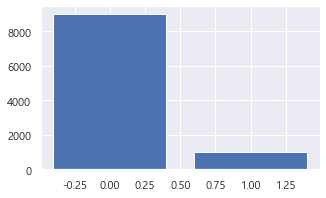

언더 샘플링_원본 데이터 결과 : 3-Fold CV f1 score: 0.9894


In [32]:
x_data, y_class = make_classification(n_classes=2, class_sep=2, n_samples = 10000,
                                      n_features=20, weights=[0.9, 0.1], flip_y=0,
                                      n_clusters_per_class=1, random_state=10)

print(x_data.shape)
y_class.shape

plt.figure(figsize=(5,3))
count_and_plot(y_class)

RandomForest_Result(x_data, y_class,"언더 샘플링_원본 데이터 결과")

### 2)Random Under Sampling

Class=0, n=1000 (50.000%)
Class=1, n=1000 (50.000%)


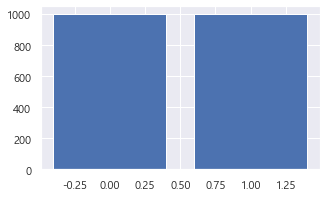

언더 샘플링_랜덤언더 샘플링 데이터 결과 : 3-Fold CV f1 score: 0.9938


In [33]:
under_random = RandomUnderSampler(sampling_strategy='majority')

x_random, y_random = under_random.fit_resample(x_data,y_class)

plt.figure(figsize=(5,3))
count_and_plot(y_random)

RandomForest_Result(x_random, y_random,"언더 샘플링_랜덤언더 샘플링 데이터 결과")

Class=0, n=2000 (66.667%)
Class=1, n=1000 (33.333%)


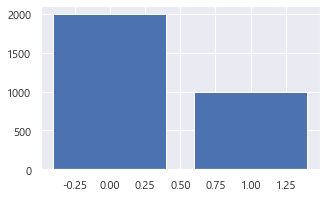

언더 샘플링_랜덤언더 샘플링_비율: 0.5_데이터 결과 : 3-Fold CV f1 score: 0.9938


In [23]:
under_random_05 = RandomUnderSampler(sampling_strategy=0.5)

x_random_05, y_random_05 = under_random_05.fit_resample(x_data,y_class)

plt.figure(figsize=(5,3))
count_and_plot(y_random_05)
RandomForest_Result(x_random_05, y_random_05,"언더 샘플링_랜덤언더 샘플링_비율: 0.5_데이터 결과")

### 3)TomekLinks

Class=0, n=8993 (89.993%)
Class=1, n=1000 (10.007%)


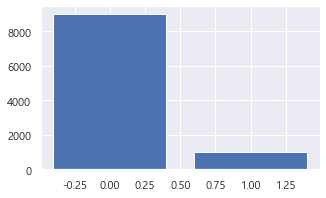

언더 샘플링_토멕링크_데이터 결과 : 3-Fold CV f1 score: 0.9894


In [28]:
tl = TomekLinks()
x_tl, y_tl = tl.fit_resample(x_data,y_class)

plt.figure(figsize=(5,3))
count_and_plot(y_tl)

RandomForest_Result(x_tl, y_tl, '언더 샘플링_토멕링크_데이터 결과')

### 4)oss

Class=0, n=7666 (88.461%)
Class=1, n=1000 (11.539%)


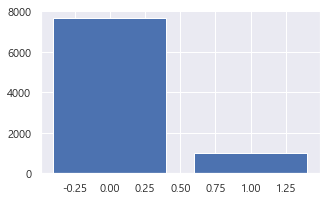

언더 샘플링_OSS_데이터 결과 : 3-Fold CV f1 score: 0.9886


In [30]:
oss = OneSidedSelection(random_state=42)
x_oss, y_oss = oss.fit_resample(x_data, y_class)
plt.figure(figsize=(5,3))
count_and_plot(y_oss)

RandomForest_Result(x_oss, y_oss , '언더 샘플링_OSS_데이터 결과')

## Oversampling

### 1)데이터셋 준비 및 확인

(10000, 20)
Class=0, n=9000 (90.000%)
Class=1, n=1000 (10.000%)


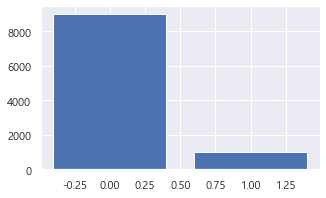

오버 샘플링_원본 데이터 결과 : 3-Fold CV f1 score: 0.9884


In [35]:
x_data, y_class = make_classification(n_classes=2, class_sep=2, n_samples = 10000,
                                      n_features=20, weights=[0.9, 0.1], flip_y=0,
                                      n_clusters_per_class=1, random_state=10)

print(x_data.shape)
y_class.shape

plt.figure(figsize=(5,3))
count_and_plot(y_class)

RandomForest_Result(x_data, y_class,"오버 샘플링_원본 데이터 결과")

### 2)Random over sampling

Class=0, n=9000 (50.000%)
Class=1, n=9000 (50.000%)


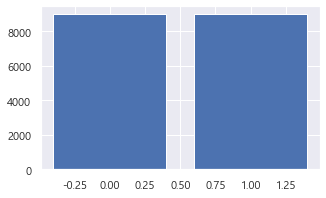

오버 샘플링_랜덤오버샘플링 결과 : 3-Fold CV f1 score: 0.9993


In [41]:
ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(x_data, y_class)

plt.figure(figsize=(5,3))
count_and_plot(y_ros)

RandomForest_Result(x_ros, y_ros,"오버 샘플링_랜덤오버샘플링 결과")

### 3)SMOTE

Class=0, n=9000 (50.000%)
Class=1, n=9000 (50.000%)


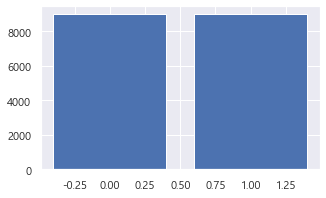

오버 샘플링_SMOTE 결과 : 3-Fold CV f1 score: 0.9984


In [40]:
smote = SMOTE()
x_sm, y_sm = smote.fit_resample(x_data, y_class)

plt.figure(figsize=(5,3))
count_and_plot(y_sm)
RandomForest_Result(x_sm, y_sm,"오버 샘플링_SMOTE 결과")

### 4)ADASYN

Class=0, n=9000 (49.972%)
Class=1, n=9010 (50.028%)


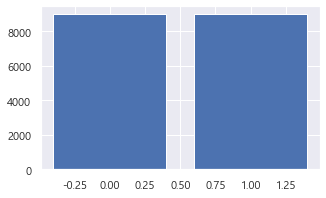

오버 샘플링_ADASYN 결과 : 3-Fold CV f1 score: 0.9989


In [42]:
ada = ADASYN(random_state=42)
x_ada, y_ada = ada.fit_resample(x_data, y_class)


plt.figure(figsize=(5,3))
count_and_plot(y_ada)
RandomForest_Result(x_ada, y_ada,"오버 샘플링_ADASYN 결과")

### 5)Boderline Smote

Class=0, n=9000 (50.000%)
Class=1, n=9000 (50.000%)


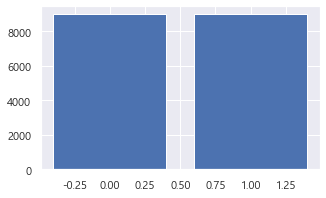

오버 샘플링_Borderline SMOTE 결과 : 3-Fold CV f1 score: 0.9987


In [46]:
bor_sm = BorderlineSMOTE(random_state=42)
x_bor_sm, y_bor_sm = bor_sm.fit_resample(x_data,y_class)

plt.figure(figsize=(5,3))
count_and_plot(y_bor_sm)
RandomForest_Result(x_bor_sm, y_bor_sm,"오버 샘플링_Borderline SMOTE 결과")

# 실습8

## 라이브러리 IMPORT

In [58]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import os 
if os.name == 'nt' :  # Windows OS 
    font_family = "Malgun Gothic"
else: # MAC OS 
    font_family = "AppleGothic"

sns.set(font=font_family, rc ={"axes.unicode_minus" : False})


## 데이터로드

In [62]:
from sklearn.datasets import load_iris
iris = load_iris()

# print(iris.DESCR)

iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## 데이터프레임 변환

In [78]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
sy = pd.Series(iris.target, dtype = 'category')
sy = sy.cat.rename_categories(iris.target_names)
df['target'] = sy

df['target'] = iris.target
cols = iris.feature_names

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## iris 데이터 시각화

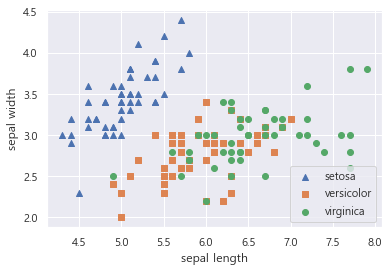

In [82]:
markers = ['^','s','o']

for i, marker in enumerate(markers):
    x_axis_data = df[df['target'] == i]['sepal length (cm)']
   
    y_axis_data = df[df['target'] == i]['sepal width (cm)']   
    plt.scatter(x_axis_data,y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

## 주성분 분석(PCA)

In [85]:
iris_scaled = StandardScaler().fit_transform(df.iloc[:,:-1])
pca = PCA(n_components=2)

pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [91]:
pca_colunms= ['pca_component_1', 'pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca,columns= pca_colunms)
irisDF_pca.head()

,pca_component_1,pca_component_2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 정확도 : ', scores)
print('원본 데이터 교차 검증 평균 정확도 : ', np.mean(scores))


원본 데이터 교차 검증 정확도 :  [0.98 0.94 0.96]
원본 데이터 교차 검증 평균 정확도 :  0.96


In [96]:
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)
print('PCA 데이터 교차 검증 정확도 : ', scores_pca)
print('PCA 데이터 교차 검증 평균 정확도 : ', np.mean(scores_pca))


PCA 데이터 교차 검증 정확도 :  [0.88 0.88 0.88]
PCA 데이터 교차 검증 평균 정확도 :  0.88


## t-SNE

In [97]:
print(df.columns)
df.head()

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [100]:
train_df = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
tsne_np = TSNE(n_components=2).fit_transform(train_df)

tsne_df = pd.DataFrame(tsne_np, columns=['component 0', 'component 1'])
tsne_df.head()

,component 0,component 1
0,11.780503,21.414089
1,12.570706,18.684092
2,11.394628,18.986465
3,11.739829,18.477972
4,11.369051,21.477808


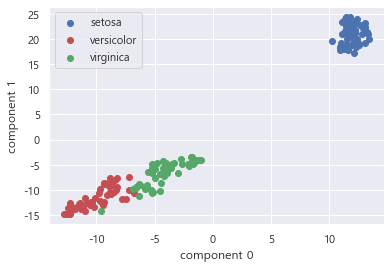

In [118]:
tsne_df['target'] = df['target']

tsne_df_0 = tsne_df[tsne_df['target'] == 0]
tsne_df_1 = tsne_df[tsne_df['target'] == 1]
tsne_df_2 = tsne_df[tsne_df['target'] == 2]

plt.scatter(tsne_df_0['component 0'],tsne_df_0['component 1'], color = 'b', label = 'setosa')
plt.scatter(tsne_df_1['component 0'],tsne_df_1['component 1'], color = 'r', label = 'versicolor')
plt.scatter(tsne_df_2['component 0'],tsne_df_2['component 1'], color = 'g', label = 'virginica')

plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()